# Guide: Convolutions and local structure

The assignments for this week is given in a separate notebook. This notebook just contains examples and is not graded.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

np.set_printoptions(precision=2, suppress=True) # change this in case you need more precision

# The config below gives neat plots, remove if it is not working in your setup
%config InlineBackend.figure_format = 'svg'

In this lab we will often find the need to show images side by side for comparison. A function to do so is given here.

In [2]:
def imshow_row(imttllist, axs=False):
    n = len(imttllist)
    for i, imttl in enumerate(imttllist):
        if imttl is None:
            continue
        im, ttl = imttl
        plt.subplot(1,n,i+1)
        plt.imshow(im, cmap='gray')
        if not axs:
            plt.axis('off')
        plt.title(ttl)

## 1. Convolutions

The definition for the convolution $G=F\star W$ of two discrete
functions $F$ and $W$ is:
\begin{align}
   G[i,j] = \sum_{k=-\infty}^\infty \sum_{l=-\infty}^\infty F[i-k,j-l] W[k,l]
\end{align}
The recipe to calculate the convolution is:

1. Begin by \"mirroring\" the function $W$ with respect to the origin to obtain a mirrored function, denoted as $W^m[i,j]=W[-i,-j]$.

2. Next, translate the mirrored weight function $W^m$ to a specific location, $(k,l)$, within the image - denoted $W^m_{(k,l)}$.

3. Perform an element-wise multiplication between the image and translated $W^m_{(k,l)}$.

4. Finally, sum the values obtained from the multiplication the convolution result at the point $(i,j)$.

Let's do this for a simple example. Below you see a small image $F$
and a weight function $W$. Here we use the convention that when
drawing weight functions (also called kernels) we assume it is defined
over the infinite two dimensional domain, but we indicate only those
values different from zero (note that points $(k,l)$ such that
$W[k,l]=0$ do not add to the convolution result, we simply can ignore
those points). In particular, the origin of the function represented by the weight matrix $W$ is assumed to be in the center of the matrix given (see also the explanation a few cells down).

In [3]:
F = np.random.randint(0,10,(11,11))
print(F)

[[6 1 5 4 0 1 1 2 4 5 3]
 [6 0 8 4 4 9 2 2 4 5 7]
 [2 4 9 5 1 3 1 6 5 2 2]
 [8 8 3 9 2 2 6 9 3 1 5]
 [3 1 6 1 4 9 0 8 8 3 1]
 [6 1 3 4 5 1 4 2 6 6 9]
 [6 2 8 5 7 8 4 2 8 0 0]
 [5 6 4 5 4 7 3 3 1 5 5]
 [5 0 2 6 3 8 0 3 5 6 9]
 [2 6 7 8 8 1 4 2 0 8 2]
 [3 6 8 3 0 8 3 7 7 0 1]]


In [4]:
W = np.ones((3,3))/9
print(W)

[[0.11 0.11 0.11]
 [0.11 0.11 0.11]
 [0.11 0.11 0.11]]


In [5]:
G = convolve(F, W)
print(G)
print(G.dtype)

[[4 4 3 3 3 2 2 2 3 4 4]
 [3 4 4 4 3 2 3 2 3 4 4]
 [4 5 5 5 4 3 4 4 4 3 4]
 [4 4 5 4 4 3 4 5 4 3 2]
 [4 4 4 4 4 3 4 5 5 4 4]
 [3 4 3 4 4 4 4 4 4 4 3]
 [4 4 4 5 5 4 3 3 3 4 4]
 [4 4 4 4 5 4 4 3 3 4 4]
 [3 4 4 5 5 4 3 2 3 4 5]
 [3 4 5 4 5 3 4 3 4 4 4]
 [3 5 6 4 4 3 4 4 4 2 1]]
int64


Note that the data type of array `G` is `int64` (or another integral type, depending on your system) even though it represents an average. This behavior differs from Python's default, which would return a floating-point value. In the `convolve` function, the output array inherits the input image's data type by default, a logical choice in image processing but inconvenient for our purposes. You can specify `output=np.float64` as a named argument to override this default behavior.


In [6]:
G = convolve(F, W, output=np.float64)
print(G)
print(G.dtype)
np.convolve([1, 2, 3], [0, 1, 0.5, 2])

[[4.22 4.22 3.56 3.78 3.   2.11 2.33 2.44 3.67 4.44 4.56]
 [3.67 4.56 4.44 4.44 3.44 2.44 3.   3.   3.89 4.11 4.  ]
 [4.89 5.33 5.56 5.   4.33 3.33 4.44 4.22 4.11 3.78 4.  ]
 [4.33 4.89 5.11 4.44 4.   3.11 4.89 5.11 5.   3.33 2.44]
 [4.89 4.33 4.   4.11 4.11 3.67 4.56 5.11 5.11 4.67 4.44]
 [3.78 4.   3.44 4.78 4.89 4.67 4.22 4.67 4.78 4.56 3.22]
 [4.78 4.56 4.22 5.   5.11 4.78 3.78 3.67 3.67 4.44 4.33]
 [4.44 4.22 4.22 4.89 5.89 4.89 4.22 3.22 3.67 4.33 4.33]
 [4.   4.11 4.89 5.22 5.56 4.22 3.44 2.33 3.67 4.56 5.67]
 [3.56 4.33 5.11 5.   5.   3.89 4.   3.44 4.22 4.22 4.22]
 [3.78 5.44 6.11 5.   4.33 3.89 4.78 4.44 4.22 2.89 1.78]]
float64


array([0. , 1. , 2.5, 6. , 5.5, 6. ])

Answer the following questions for yourself to ensure you understand what's going on.

1. Calculate the convolution value G[5, 0] and G[5, 5] by hand and compare it with the result above. 

2. Note that G[5, 0] is a value on the border. The 3x3 neighborhood is partly outside the domain of image F. What mode for the border is the convolve function using by default (we didn't specify it explicitly)? Hint: try the `?convolve` command.

3. Try some other modes for handling the border and see if you can calculate the results also by hand.

Using a very simple 48x48 image you have to convolve that image with various weight kernels to get an understanding of what convolution is doing.

To deepen your comprehension, consider the following exercises:

1. Calculate the convolution values at $G[5, 0]$ and $G[5, 5]$ by hand and then compare these with your previous results. This exercise will help you understand the convolution process at specific points.

2. Note that $G[5, 0]$ is located at the border of the image, where the 3x3 neighborhood extends beyond the domain of image $F$. Determine the default border mode used by the `convolve` function (since it wasn't explicitly mentioned). *Hint*: Use the `?convolve` command to find out.

3. Experiment with different border modes for the convolution and try to manually calculate the results for each mode. This will enhance your understanding of how border conditions affect the convolution outcomes.

This task involves using a simple 48x48 image and convolving it with various kernels to get a practical understanding of what convolution does.


(48, 48)


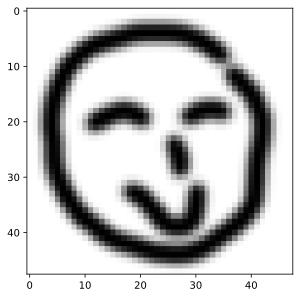

In [7]:
try:
    f_smiley = plt.imread('smiley.png')[:,:,1]
except FileNotFoundError:
    print("Please make sure smiley.png is in your current directory.")


plt.imshow(f_smiley, cmap='gray');
print(f_smiley.shape)

We start with a $5\times5$ average filter
\begin{equation}
f \ast \frac{1}{25} \begin{bmatrix}
    1 & 1 & 1 & 1 & 1\\
    1 & 1 & 1 & 1 & 1\\
    1 & 1 & \underline1 & 1 & 1\\
    1 & 1 & 1 & 1 & 1\\
    1 & 1 & 1 & 1 & 1
    \end{bmatrix}
\end{equation}

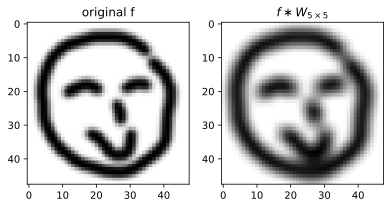

In [8]:
W5x5 = np.ones((5,5))/25
g_smiley_5x5 = convolve(f_smiley, W5x5)
imshow_row([(f_smiley,"original f"), (g_smiley_5x5, r"$f\ast W_{5\times5}$")], axs=True)

Be aware that the `convolve` function's operation may seem unusual, as it appears to set the origin of the array (image) at its center, contrary to the array's actual origin at the top-left pixel. This is an intentional design choice, and the function allows for adjusting the origin's position. Consider the convolution:

$$
f \ast \frac{1}{25} 
\begin{bmatrix}
    \underline{1} & 1 & 1 & 1 & 1\\
    1 & 1 & 1 & 1 & 1\\
    1 & 1 & 1 & 1 & 1\\
    1 & 1 & 1 & 1 & 1\\
    1 & 1 & 1 & 1 & 1
\end{bmatrix}
$$

What differences do you anticipate when the kernel's origin is centrally located? Remember, the `origin` argument in the `convolve` function specifies the origin's position relative to the center of the `weights` array. Thus, `origin=(-2,-2)` places the origin at the top-left corner of a 5x5 array `W5x5`.


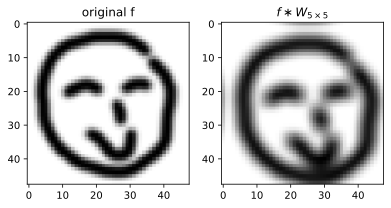

In [9]:
g_smiley_tl = convolve(f_smiley, W5x5, origin=(-2,-2))
imshow_row([(f_smiley,"original f"), (g_smiley_tl, r"$f\ast W_{5\times5}$")], axs=True)

The two convolutions are the same.


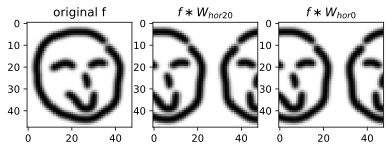

In [10]:
W_hor_0 = np.zeros((1,41))
W_hor_20 = np.zeros((1,41))
W_hor_20[0,20] = 1
W_hor_0[0,0] = 1
g_smiley_hor_20 = convolve(f_smiley, W_hor_0, mode='mirror')
g_smiley_hor_0 = convolve(f_smiley, W_hor_20, origin=(0,20), mode='mirror')
imshow_row([(f_smiley,"original f"), 
            (g_smiley_hor_20, r"$f\ast W_{hor20}$"),
            (g_smiley_hor_0, r"$f\ast W_{hor0}$")], axs=True)
if (g_smiley_hor_20 == g_smiley_hor_0).all():
    print("The two convolutions are the same.")
else:
    print("Something went wrong.")

### Exercise 1a: The pulse function

Answer the theory question about the pulse function in ANS. You can check your answers with the following code:

In [11]:
def Delta(k, l):
    m = 2 * np.maximum(np.abs(k), np.abs(l)) + 1
    c = m // 2
    D = np.zeros((m,m))
    D[c+k, c+l] = 1
    return D

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


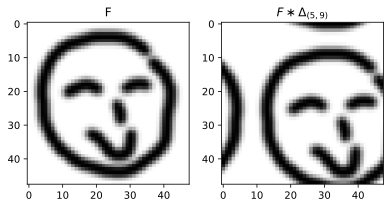

In [12]:
print(Delta(-2,-2))
print(Delta(5,3))

imshow_row([(f_smiley,"F"), (convolve(f_smiley, Delta(5,9)), r"$F\ast\Delta_{(5,9)}$")], axs=True)

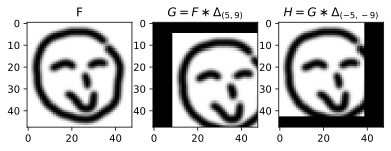

In [13]:
border_mode = "constant"
G = convolve(f_smiley, Delta(5,9), mode=border_mode)
H = convolve(G, Delta(-5,-9), mode=border_mode)
imshow_row([(f_smiley,"F"), 
            (G, r"$G = F\ast\Delta_{(5,9)}$"),
            (H, r"$H = G\ast\Delta_{(-5,-9)}$")], axs=True)

### Exercise 1b: Border modes

Try the different border modes in de code above and answer the questions in ANS.

The issue discussed above highlights a broader principle: the lack of associativity in convolution operations for images within a bounded domain, as $(F\ast\Delta_{(k,l)})\ast\Delta_{(-k,-l)} \neq F \ast (\Delta_{(k,l)} \ast \Delta_{(-k,-l)}) = F\ast\Delta_{(0,0)}$ demonstrates. This deviation from the associativity found in unbounded domains indicates that certain convolution properties do not hold in a discrete, bounded context. For example, while theoretically, in an infinite domain, we have $F\ast W = W\ast F$ indicating commutativity and equal treatment of $F$ and $W$, this is not observed in practice as the following code snippet will show.


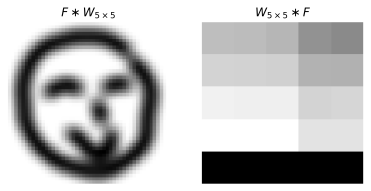

In [14]:
imshow_row( [(convolve(f_smiley, W5x5), r"$F\ast W_{5\times5}$"),
             (convolve(W5x5, f_smiley), r"$W_{5\times5}\ast F$")] )

We see that commutativity is not strictly true in the bounded discrete domain. And again by chosing the appropriate border mode *and* embedding the small 5x5 kernel into a larger kernel (the size of the image we want) we can obtain something that looks like commutativity.

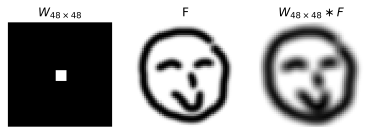

In [15]:
W48x48 = np.zeros((48,48))
W48x48[22:27,22:27] = W5x5
imshow_row( [(W48x48, r"$W_{48\times48}$"),
             (f_smiley, "F"),
             (convolve(W48x48, f_smiley, mode="wrap"), r"$W_{48\times48} \ast F$")])

### Exercise 1c: Convolution operators

Answer the theory question about Convolution operators in ANS.

## 2. Derivative convolutions

Negative weights in a kernel allow us to capture differences and, by extension, derivatives. As outlined in the lecture notes [section 6.1.2](https://rvdboomgaard.github.io/ComputerVision_LectureNotes/LectureNotes/IP/LocalStructure/GaussianDerivatives.html#derivatives-of-sampled-functions), three distinct finite difference schemes (convolution kernels) are introduced for computing the partial derivative in the x direction:

$$
F_x \approx F \ast \begin{bmatrix}1 & \underline{-1} & 0\end{bmatrix}
$$

$$
F_x \approx F \ast \begin{bmatrix}0 & \underline{1} & -1\end{bmatrix}
$$

$$
F_x \approx F \ast \frac{1}{2}\begin{bmatrix}1 & \underline{0} & -1\end{bmatrix}
$$

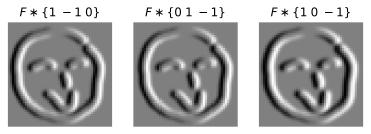

In [16]:
Dright = np.array([[1,-1,0]])
Dleft = np.array([[0,1,-1]])
Dcentral = np.array([[1,0,-1]])/2

Fxright = convolve(f_smiley, Dright)
Fxleft = convolve(f_smiley, Dleft)
Fxcentral = convolve(f_smiley, Dcentral)
imshow_row([(Fxright, r"$F \ast \{1 \; -1 \; 0\}$"),
            (Fxleft, r"$F \ast \{0 \; 1 \; -1\}$"),
            (Fxcentral, r"$F \ast \{1 \; 0 \; -1\}$")])

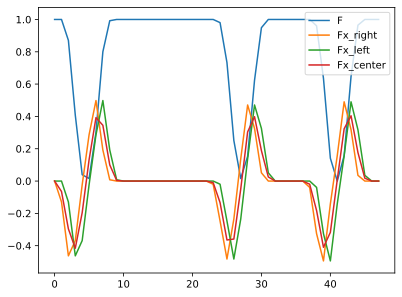

In [17]:
plt.plot(f_smiley[28], label='F')
plt.plot(Fxright[28], label='Fx_right')
plt.plot(Fxleft[28], label='Fx_left')
plt.plot(Fxcentral[28], label='Fx_center')
plt.legend();

### Exercise 1d: Differences

Answer the theory question about differences in ANS.

## 3. Separable Convolutions

An outcome of the associative property is the **dimensional separability** of some convolution kernels. The $t\times7$ kernel can be broken down into the convolution of a horizontal and a vertical kernel, both comprising 7 ones:

$$
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & \underline{1} & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1 & 1 & 1
\end{bmatrix} = 
\begin{bmatrix}
1\\ 1\\ 1\\ \underline{1}\\ 1\\ 1\\ 1
\end{bmatrix}
\ast
\begin{bmatrix}
1 & 1 & 1 & \underline{1} & 1 & 1 & 1
\end{bmatrix}
$$
$$W_{7\times7} = W_{7\times1} \ast W_{1\times7}$$

Verify that this decomposition is accurate by performing the convolution on the right-hand side to reproduce the left-hand side kernel. Implementing convolution 
$$F \ast W_{7\times7}$$
requires 49 operations per pixel, but using separable convolutions:
$$
(F\ast W_{7\times1})\ast W_{1\times7}
$$
reduces the operations to $2\times 7$ per pixel.

In the following code block, compare several implementations of a uniform filter of varying sizes. For a direct convolution, use:
$$
F \ast W_{N\times N}
$$
with `convolve(F, np.ones((N, N)))`. For the separable approach, use:
$$
(F\ast W_{N\times1})\ast W_{1\times N}
$$
in Python as `convolve(convolve(F, np.ones((N, 1))), np.ones((1, N)))`. Also compare these with the `uniform_filter` from `scipy.ndimage`: `uniform_filter(F, N)`. Sample code for running these three uniform filter implementations is provided.


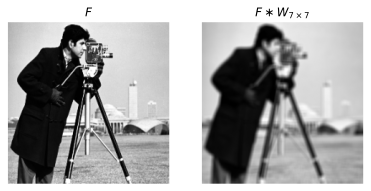

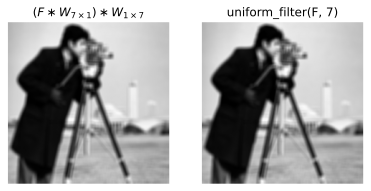

In [18]:
try:
    Fcam = plt.imread('cameraman.png')
except FileNotFoundError:
    print("Please make sure cameraman.png is in your current directory.")

Fcam_2d_7 = convolve(Fcam, np.ones((7,7)))
Fcam_sep_7 = convolve(convolve(Fcam, np.ones((7, 1))), np.ones((1, 7)))
from scipy.ndimage import uniform_filter
Fcam_scipy = uniform_filter(Fcam, 7)

imshow_row([(Fcam, r"$F$"),
            (Fcam_2d_7, r"$F\ast W_{7\times7}$")])
plt.figure()
imshow_row([(Fcam_sep_7, r"$(F\ast W_{7\times1})\ast W_{1\times7}$"),
            (Fcam_scipy, "uniform_filter(F, 7)")])

### Programming exercise 1

Time the three versions of the uniform convolution for different values of N in the first exercise of the hand-in notebook for assignment 3. Then answer the questions about your timing diagrams.

### Exercise 1e: Sobel filter

Answer the theory question about the Sobel filter in ANS.

## 4. Impulse Responses

The lecture notes on [Linear local operators](https://rvdboomgaard.github.io/ComputerVision_LectureNotes/LectureNotes/IP/LocalOperators/linearoperators_revised.html#linear-operators-convolutions) explain that a linear, translation-invariant operator can be represented as a convolution with the impulse response functioning as the kernel. Therefore, to determine the impulse response of an image filter that is purported to be linear and translation invariant, the filter should be applied to an image displaying a single point of value 1 amidst zeros.


In [19]:
I = np.zeros((11,11))
I[5,5] = 1
print(I)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [20]:
uniformI = uniform_filter(I, 7)
print(uniformI)

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.   0.  ]
 [0.   0.   0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.   0.  ]
 [0.   0.   0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.   0.  ]
 [0.   0.   0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.   0.  ]
 [0.   0.   0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.   0.  ]
 [0.   0.   0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.   0.  ]
 [0.   0.   0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


Note: we have set the pulse in the middle of the 11x11 image. This means that the origin of the impulse response function is also at that point in the middle.

### Programming exercise 2 + 3

Now you are ready to do the programming exercises 2 and 3 in the hand-in notebook for assignment 3.

### Exercise 1f. Sobel and Prewitt

Answer the theory question about Sobel and Prewitt filters in ANS.

## 5. Analytical Derivatives

Consider the function $f$ in two variables:
\begin{align}
f(x,y) = A\sin(Vx) + B\cos(Wy)
\end{align}

### Exercise 2a. Partial derivatives

Answer the theory question about partial derivatives in ANS.

Next we are going to sample the functions $f$, $f_x$ and $f_y$ on a regular grid of 128x128 sample points with $x$ and $y$ values ranging from $-1$ to $1$. We will use a ``meshgrid`` to make two arrays ``X`` and ``Y`` where ``X`` gives the $x$ coordinate for each of the points on the regular grid and ``Y`` gives the $y$ coordinates.

In [21]:
x = np.arange(-50,51)
y = np.arange(-50,51)
X, Y = np.meshgrid(x, y)

### Programming exercise 4

Now make the programming exercise 4 and write the code to generate the discrete images (sampled functions) ``F``, ``Fx`` and ``Fy``. 

## 6. Finite Difference Derivatives

We are more or less going to repeat the exercise from the previous section. This time for the function:

\begin{align}
f(x,y) = 3(1-x)^2 \exp\left(-x^2 - (y-1)^2\right)
 - 10\left(\frac{x}{5} - x^3 - y^5\right) \exp\left(-x^2 - y^2\right) 
 - \frac{1}{3} \exp\left(-(x+1)^2 - y^2\right)
 \end{align}
 
This is the image that in 3D rendering make up the Matlab logo (consider this a tribute to the legacy of a great program after which many array processing languages are modelled).

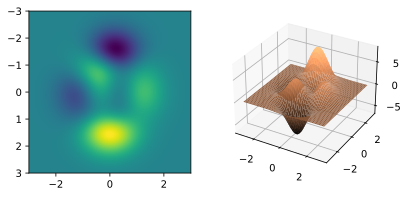

In [22]:
# %matplotlib qt  # use this in case you want an interactive 3D plot
from mpl_toolkits.mplot3d import Axes3D

xml = np.linspace(-3, 3, 150)
yml = np.linspace(-3, 3, 150)
Xml, Yml = np.meshgrid(xml, yml)
Fml = 3 * (1-Xml)**2 * np.exp(-(Xml**2) - (Yml+1)**2) \
    - 10 * (Xml/5 - Xml**3 - Yml**5) * np.exp(-Xml**2 - Yml**2) \
    - 1/3 * np.exp(-(Xml+1)**2 - Yml**2) 

fig = plt.figure(99)
ax1 = fig.add_subplot(121)
ax1.imshow(Fml, extent=(-3,3,3,-3), origin='upper');
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(Xml, Yml, Fml, cmap='copper');

Like in the previous section we could calculate the partial derivative with respect to $x$ and $y$ analytically (be my guest to do it!). In this section however you have to use the left finite difference convolution from programming exercise 3 to estimate the derivates.

### Programming exercise 5

Now do the programming exercise 5.

## 7. Gaussian Derivatives

### Sampling of and Convolution with the Gaussian 2D Function

The 2D Gaussian function $G^s(x,y)$ is defined as:
\begin{align}
G^s(x,y) = \frac{1}{s\sqrt{2\pi}} e^{-\frac{x^2+y^2}{2 s^2}}
\end{align}
To do a convolution with a Gaussian kernel we have to sample this function on a discrete grid.
Note that the function never is zero! For large values of $|x|$ and $|y|$ the function quickly approaches zero fortunately so we may truncate the grid to values $-N, -N+1, \cdots, -2, -1, 0, 1, 2, \cdots, N$ for both $x$ and $y$.

To generate the grid the ``np.meshgrid`` function can be used again. The selected value for $N$ should of course depend on the scale $s$. In your code you have to set $N$ equal to $\lceil\mathtt{factor} \times \mathtt{scale}\rceil$ where ``factor`` is a multiplication factor that influences the approximation error caused by truncating the function.

### Programming exercise 6

Now make programming exercise 6 and write the code for the 2D Gaussian function. Then answer the questions about the exercise.

### Sampling the (Derivative of) the 1D Gauss Function

In the lecture notes you can learn that the Gaussian function is the only rotationally symmetric function that can is separable by dimension, i.e.
\begin{align}
G^s(x, y) = G^s(x)\,G^s(y)
\end{align}
where we have used $G^s$ to denote both the 2D function as well as the 1D Gaussian function. The context will make this clear. In this subsection only the 1D version of $G^s$ (and its derivatives) are discussed and to be implemented.

### Exercise 2b: Gaussian Derivatives

Answer the theory question about Gaussian Derivatives in ANS.

Evidently $P_1(x)=1$ and it is your task to calculate $P_1(x)$ and $P_2(x)$. Hint: both $P_1$ and $P_2$ are polynomials in $x$. In your code you have to sample (and normalize) $G^s(x)$ and multiply that discrete version with the appropriate sampled version of $P_n(x)$.

### Programming exercise 7

Now make programming exercise 7 and write the code for the 1D Gaussian function. Test the correctness of your results.

### Separable Gaussian (Derivative) Convolution

A convolution kernel $w(x,y)$ is called separable in case
$$w(x,y) = h(x)\,v(y)$$
where $h$ and $v$ are two 1D functions (where $h$ stands for the horizontal function and $v$ for the vertical function). It is simple to prove that for a separable kernel:
\begin{align}
f\ast w = (f\ast_h h) \ast_v v
\end{align}
where $f \ast_h h$ is the 1D convolution of a 2D image $f$ along all its rows with kernel $h$ and $\ast_v$ is the convolution of an image along all its columns. We have seen this property before for the uniform kernel. There are many separable kernels of course but the Gaussian kernel is the unique kernel that is rotationally symmetric.

### Exercise 2c and 2d: Gaussian Derivatives and Seperability

Finish the theory question on the Gaussian Derivatives and seperability in ANS.

In ``scipy.ndimage`` a special function is available to do one dimensional convolutions along one of the axes of the image array: ``convolve1d``. The ``axis`` named parameter indicates along wich axis the convolution has to be done.

### Programming exercise 8

Now make programming exercise 8 and write the code for the gD function.

## 8. Comparing Derivatives

Remember the function
\begin{align}
f(x,y) = A\sin(Vx) + B\cos(Wy)
\end{align}
and its derivatives $f_x$ and $f_y$ that you have calculated before in this lab exercise. Now we are going to compare the analytical results with the results calculated with Gaussian derivative convolutions.

In [23]:
x = np.arange(-50,51)
y = np.arange(-50,51)
X, Y = np.meshgrid(x, y)
A = 1
B = 2
V = 6 * np.pi / 100
W = 4 * np.pi / 100

# Repeat your code for F, Fx and Fx here (see programming exercise 4):

# YOUR CODE HERE

imshow_row([(F, r"$f$"),
            (Fx, r"$f_x$"),
            (Fy, r"$f_y$")])
plt.gray()

NameError: name 'Fx' is not defined

In [ ]:
# Repeat your code for Gauss1d and gd here (see programming exercise 7 and 8):

# YOUR CODE HERE
    
# Use the function gD to calculate cFx, cFy by Gaussian derivative convolutions.

# YOUR CODE HERE

imshow_row([(F, r"$f$"),
            (cFx, r"$f_x\approx f \ast G^1_x$"),
            (cFy, r"$f_y\approx f \ast G^1_y$")])

NameError: name 'cFx' is not defined

Let's compare Fx with cFx by plotting the values along a horizontal line through the center of the image.

In [ ]:
plt.figure()
plt.plot(Fx[Fx.shape[0]//2], label=r"Fx $(f_x)$")
plt.plot(cFx[cFx.shape[0]//2], label=r"cFx $(f \ast G^{%5.2f}_x)$" % s)
plt.legend();

NameError: name 'Fx' is not defined

<Figure size 640x480 with 0 Axes>

### Exercise 2e: Comparing Derivatives

Finish the theory question about Comparing Derivatives in ANS.

## 5. Canny Edge Detector

Finding edges in images is often an important first step in image processing applications. Whereas in the past a lot of edge detectors have been suggested, nowadays most often the Canny edge detector is used.

An explanation of the Canny edge detector in terms of local structure as calculated with Gaussian derivatives can be found [here](https://rvdboomgaard.github.io/ComputerVision_LectureNotes/LectureNotes/IP/LocalStructure/LocalStructure.html#canny-edge-detector)

### Programming exercise 9

Now do the programming exercise 9 and implement the Canny edge detector.